# Global surface temperature anomaly analysis
- Ricardo Mo, Randy Wang, Dominic Vazquez, Sara D'Ambrogia

- instructor: Yury Kolomensky

- physics 77/88 Fall 2020

Global warming have been a urgent issue worldwide. Wildfires in California, Australia, Amazon Foreset astonished people around the world due to their long-lasting, high frequency, and the inability of recovering. Therefore, we want to analyze some climate data to see what's the trend and which factor would lead to the warming temperature.  

Data for global temperature anomaly is obatained from https://www.ncdc.noaa.gov/monitoring-references/faq/anomalies.php#grid

# What is the temperature anomaly?
- Temperatures are reported as anomalies relative to the Jan 1951-Dec 1980 average in this file
   - Using air temperature above sea ice:   14.168 +/- 0.045

# Plotting

The data in this dataset is the global surface temperature anomaly. There are two datasets in this file: In the first version, temperature anomalies in the presence of sea ice are extrapolated from land-surface air temperature anomalies. In the second version, temperature anomalies in the presence of sea ice are extrapolated from sea-surface water temperature anomalies (usually collected from open water areas on the periphery of the sea ice). I choose the first dataset to analyze. 

# take the data from file

In [10]:
#package imported 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.optimize as fitter

#read the file
anomaly_file = open("Land_and_Ocean_complete.txt", "r")
for i in range(77):
    anomaly_file.readline()

y_m = [] #columns to store the time
monthly = [] #columns for monthly anomaly and its uncertainty
annually = [] #columns for annually anomaly and its uncertainty
five_y = [] #columns for five years anomaly and its uncertainty
ten_y = [] #columns for ten years anomaly and its uncertainty
twenty_y = [] #columns for twenty years anomaly and its uncertainty

#pick up data from file
index = 77 #starting line for pick-up
for line in anomaly_file:
    #we only need the data in the first data set
    if index > 2126:
        break
        
    tokens = line.split()
    y_m.append([int(tokens[0]), int(tokens[1])])
    monthly.append([float(tokens[2]), float(tokens[3])])
    index += 1

#store all the data in the form of numpy arrays
time = np.array(y_m)
mon = np.array(monthly)


First I want to check if some specific months has a obviously high or low anomaly and if so, how to eliminate it.

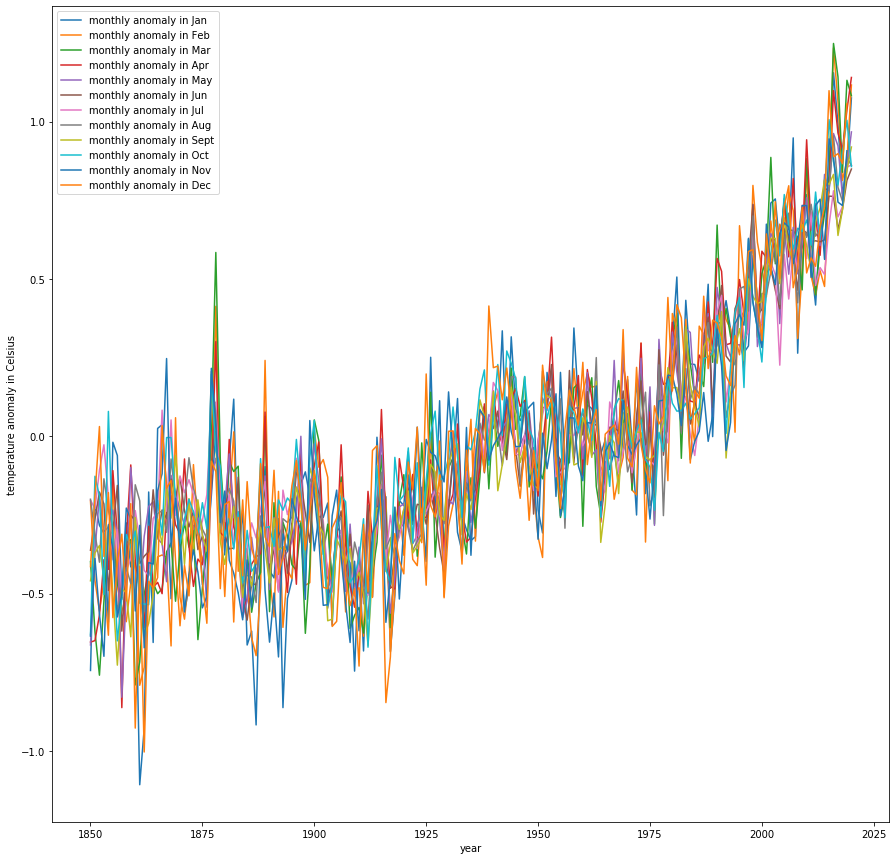

In [11]:
#plot for each month
y_m_mon = np.concatenate([y_m, mon], axis = 1)
plt.figure(figsize=(15,15))
#Jan
mon_list = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
for i in range(1,13):
    temp = y_m_mon[y_m_mon[:,1] == i, :]
    x = temp[:, 0]
    y = temp[:, 2]
    err = temp[:, 2]
    plt.plot(x, y, label= "monthly anomaly in {}".format(mon_list[i-1]))
    plt.legend()
plt.ylabel("temperature anomaly in Celsius")
plt.xlabel("year")
plt.show()

# Overall plot and data analysis

Since the time is provided in year and month, I used the "number of month" starting at certain month as the x-axis in the following plot to make the plot readable and correct in correlation.

parameter for linear model:
a=0.0007+/-0.0000
b=-0.8589+/-0.0070 

Chi-squared for linear model:
chi^2 = 11513.78
chi^2/d.f.=5.62e+00 

correlation coefficient = 0.82143


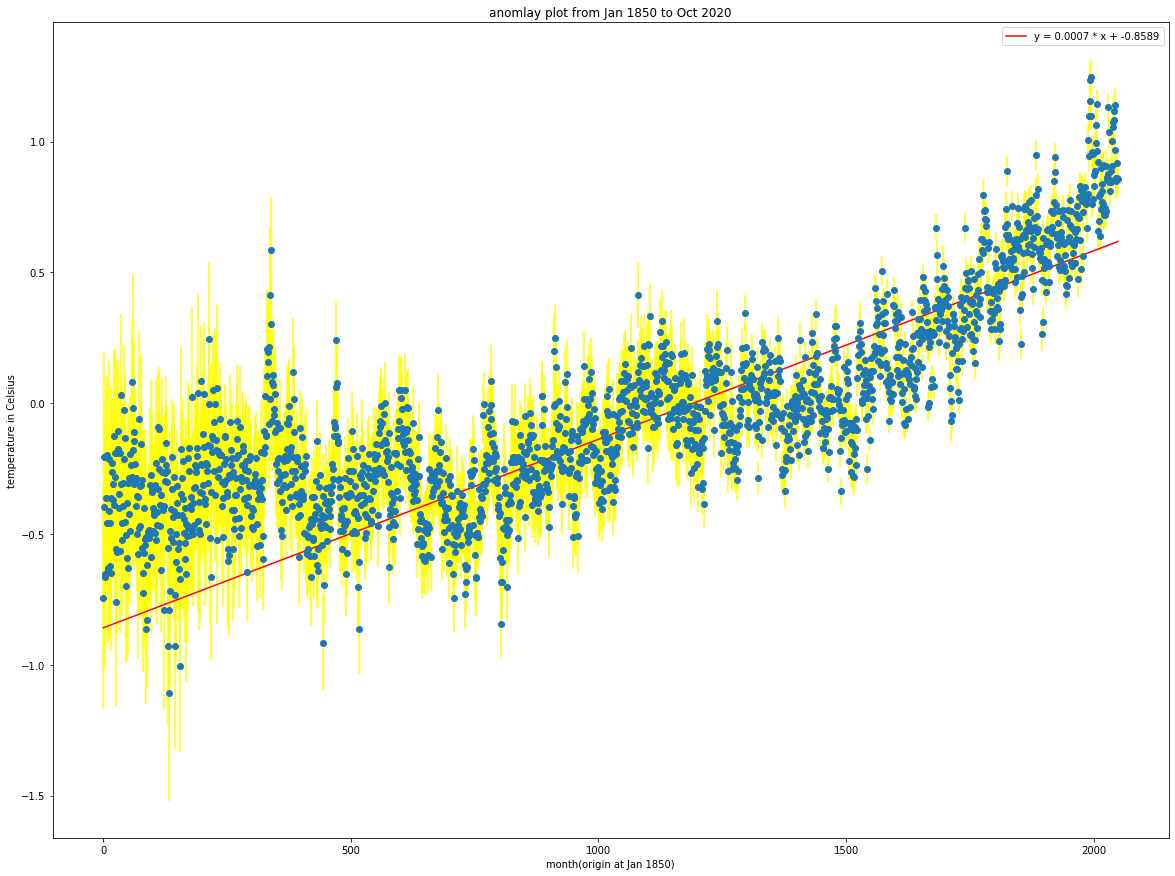

In [13]:
#plot for overall monthly anomaly data for analyzing 
plt.figure(figsize=(20,15))
anom_m = mon[:, 0]
err_m = mon[:, 1]
plt.errorbar(range(len(anom_m)), anom_m, xerr= 0, yerr= err_m, fmt = "o", ecolor = "yellow")
plt.title("anomlay plot from Jan 1850 to Oct 2020")
plt.ylabel("temperature in Celsius")
plt.xlabel("month(origin at Jan 1850)")


#Then use linear model to fit the data
xdata = range(len(anom_m))
ydata = anom_m
#use linear model
def l_model(x,a,b):
    return a*x+b
par0 = np.array([1.0, 0.0])
par, cov = fitter.curve_fit(l_model, xdata, ydata, p0=par0, sigma=err_m, absolute_sigma=True)
print("parameter for linear model:")
print ('a={0:6.4f}+/-{1:5.4f}'.format(par[0],np.sqrt(cov[0,0])))
print ('b={0:6.4f}+/-{1:5.4f}'.format(par[1],np.sqrt(cov[1,1])), "\n")

#Calculate chi-squared and reduced chi-squared for linear model
chi_squared = np.sum(((l_model(xdata, *par)-ydata)/err_m)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print("Chi-squared for linear model:")
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2e}'.format(reduced_chi_squared), "\n")
plt.plot(xdata, l_model(xdata, *par), "r", label = "y = {:.4f} * x + {:.4f}".format(*par))
plt.legend()

#calculate the correlation coef
result = np.corrcoef(xdata,ydata)
print("correlation coefficient = {:.5f}".format(result[0,1]))

plt.show()

# Comparing different periods
Besides the overall data for the whole period, I also pick up three periods of twenty years to compare their increasing speed of the temperature anomaly.

parameter for linear model in the period 1850-1870:
a=0.00066+/-0.0002
b=-0.43757+/-0.0360 



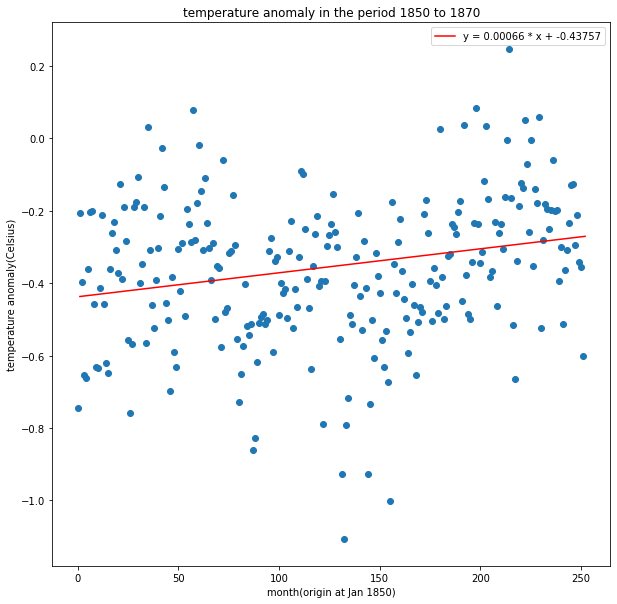

In [19]:
#extract data from 1850 to 1870
y_m_mon = np.concatenate([y_m, mon], axis = 1)
temp1 = y_m_mon[y_m_mon[:,0] >= 1850, :] #data from 1800
temp_p1 = temp1[temp1[:,0] <= 1870, :]
plt.figure(figsize = (10,10))
plt.scatter(range(len(temp_p1)) ,temp_p1[:, 2])
plt.title("temperature anomaly in the period 1850 to 1870")
plt.xlabel("month(origin at Jan 1850)")
plt.ylabel("temperature anomaly(Celsius)")


xdata = range(len(temp_p1))
ydata = temp_p1[:,2]
sigma = temp_p1[:,3]
#use linear model
par, cov = fitter.curve_fit(l_model, xdata, ydata, p0=par0, sigma=sigma, absolute_sigma=True)
print("parameter for linear model in the period 1850-1870:")
print ('a={0:6.5f}+/-{1:5.4f}'.format(par[0],np.sqrt(cov[0,0])))
print ('b={0:6.5f}+/-{1:5.4f}'.format(par[1],np.sqrt(cov[1,1])), "\n")

x = np.linspace(1, len(temp_p1), 500)
y = l_model(x, *par)
plt.plot(x, y, "r", label = "y = {:.5f} * x + {:.5f}".format(*par))
plt.legend()
plt.show()

parameter for linear model in the period 1930-1950:
a=0.0005+/-0.0001
b=-0.1098+/-0.0169 



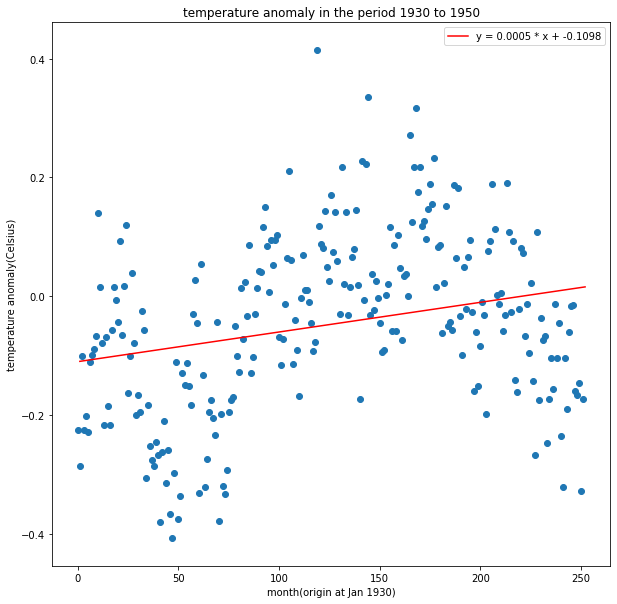

In [20]:
#extract data from 1930 to 1950
y_m_mon = np.concatenate([y_m, mon], axis = 1)
temp1 = y_m_mon[y_m_mon[:,0] >= 1930, :] #data from 1800
temp_p2 = temp1[temp1[:,0] <= 1950, :]
plt.figure(figsize = (10,10))
plt.scatter(range(len(temp_p2)) ,temp_p2[:, 2])
plt.title("temperature anomaly in the period 1930 to 1950")
plt.xlabel("month(origin at Jan 1930)")
plt.ylabel("temperature anomaly(Celsius)")


xdata = range(len(temp_p2))
ydata = temp_p2[:,2]
sigma = temp_p2[:,3]
#use linear model
par, cov = fitter.curve_fit(l_model, xdata, ydata, p0=par0, sigma=sigma, absolute_sigma=True)
print("parameter for linear model in the period 1930-1950:")
print ('a={0:6.4f}+/-{1:5.4f}'.format(par[0],np.sqrt(cov[0,0])))
print ('b={0:6.4f}+/-{1:5.4f}'.format(par[1],np.sqrt(cov[1,1])), "\n")

x = np.linspace(1, len(temp_p2), 500)
y = l_model(x, *par)
plt.plot(x, y, "r", label = "y = {:.4f} * x + {:.4f}".format(*par))
plt.legend()
plt.show()


Notes: Beside the arbitrary increasing speed, the relatively small slope of 1930 to 1950 is also due to the reason that this period is pretty close to the period that we use as the reference. 

parameter for linear model in the period 2000-2020:
a=0.0017+/-0.0001
b=0.4642+/-0.0075 



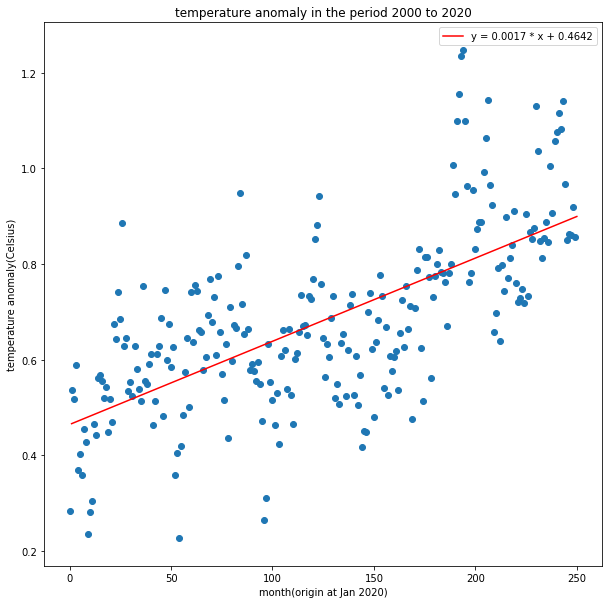

In [18]:
#extract data from 2000 to 2020
y_m_mon = np.concatenate([y_m, mon], axis = 1)
temp_p3 = y_m_mon[y_m_mon[:,0] >= 2000, :] #data from 2000 to 2020
plt.figure(figsize = (10,10))
plt.scatter(range(len(temp_p3)) ,temp_p3[:, 2])
plt.title("temperature anomaly in the period 2000 to 2020")
plt.xlabel("month(origin at Jan 2020)")
plt.ylabel("temperature anomaly(Celsius)")


xdata = range(len(temp_p3))
ydata = temp_p3[:,2]
sigma = temp_p3[:,3]
#use linear model
par, cov = fitter.curve_fit(l_model, xdata, ydata, p0=par0, sigma=sigma, absolute_sigma=True)
print("parameter for linear model in the period 2000-2020:")
print ('a={0:6.4f}+/-{1:5.4f}'.format(par[0],np.sqrt(cov[0,0])))
print ('b={0:6.4f}+/-{1:5.4f}'.format(par[1],np.sqrt(cov[1,1])), "\n")

x = np.linspace(1, len(temp_p3), 500)
y = l_model(x, *par)
plt.plot(x, y, "r", label = "y = {:.4f} * x + {:.4f}".format(*par))
plt.legend()
plt.show()

The slope in this period is two to three times to the previous and the overall speed. Although it's fluctuating, the temperature are steadily increase at an (at least) postive acceleartion.

# Histogram
Besides the increasing speed, the distribution can show us the difference in actual temperature. To visualize this comparsion more clearly, I use a histogram to see their distribution.

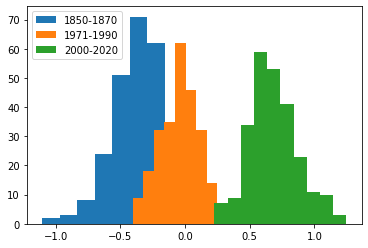

            mean      std 
1850-1870:   -0.3661    0.2037
1930-1950:   -0.0441    0.1480
2000-2020:   0.6823     0.1864


In [71]:
#overall histogram
plt.hist(temp_p1[:,2], label = "1850-1870")
plt.hist(temp_p2[:,2], label = "1971-1990")
plt.hist(temp_p3[:,2], label = "2000-2020")
plt.legend()
plt.show()
print("            mean      std ")
print("1850-1870:   {:.4f}    {:.4f}".format(np.mean(temp_p1[:,2]), np.std(temp_p1[:,2])))
print("1930-1950:   {:.4f}    {:.4f}".format(np.mean(temp_p2[:,2]), np.std(temp_p2[:,2])))
print("2000-2020:   {:.4f}     {:.4f}".format(np.mean(temp_p3[:,2]), np.std(temp_p3[:,2])))

In [76]:
#attempt to use power model, but fail

xdata = np.array(range(1, len(anom_m)+1))
ydata = anom_m
def p_model(x,a,b,c):
    return a*pow(x,b) + c
par0_p = np.array([1.0, 1.0, 1.0])
par_p, cov_p = fitter.curve_fit(p_model, xdata, ydata, p0=par0_p, sigma = err_m, absolute_sigma=True)
print("parameter for exponential model:")
print ('a={0:6.4f}+/-{1:5.4f}'.format(par_e[0],1))
print ('b={0:6.4f}+/-{1:5.4f}'.format(par_e[1],1))


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [85]:
#attempt to use exponential model, but fail
xdata = np.array(range(1, len(anom_m)+1), dtype=np.float128)
ydata = np.array(anom_m, dtype=np.float128)
def e_model(x,a,b):
    return a*np.exp(b*x)
par0_e = np.array([1.0, 1.0])
par_e, cov_e = fitter.curve_fit(e_model, xdata, ydata, p0=par0_e, sigma = err_m, absolute_sigma=True)
print("parameter for exponential model:")
print ('a={0:6.4f}+/-{1:5.4f}'.format(par_e[0],1))
print ('b={0:6.4f}+/-{1:5.4f}'.format(par_e[1],1))


parameter for exponential model:
a=1.0000+/-1.0000
b=1.0000+/-1.0000


<ipython-input-85-7b24b93fe856>:5: RuntimeWarning: overflow encountered in exp
  return a*np.exp(b*x)
